In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.13.0


In [3]:
train_dir = Path('D:/suhas/suhas project/Fruit recgnition AIML/train')
train_filepaths = list(train_dir.glob(r'**/*.*'))
train_filepaths = [f for f in train_filepaths if f.suffix.lower() in ['.jpg', '.jpeg', '.png']]



In [4]:
test_dir = Path('D:/suhas/suhas project/Fruit recgnition AIML/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [5]:
val_dir = Path('D:/suhas/suhas project/Fruit recgnition AIML/validation')
val_filepaths = list(val_dir.glob(r'**/*.jpg'))

In [6]:
import os
import pandas as pd
def image_processing(filepaths):
    if not filepaths:
        raise ValueError("The filepaths list is empty.")  
    labels = []
    for path in filepaths:
        try:
            parent_dir = os.path.dirname(path)
            label = os.path.basename(parent_dir)
            labels.append(label)
        except Exception as e:
            raise ValueError(f"Error processing file path: {path}. Details: {e}")
    filepath_series = pd.Series(filepaths, name='Filepath')
    label_series = pd.Series(labels, name='Label')
    df = pd.concat([filepath_series, label_series], axis=1)
    df = df.sample(frac=1).reset_index(drop=True)
    return df
filepaths = [
    "D:/suhas/suhas project/Fruit recgnition AIML/train/apple/image_20.jpg",
    "D:/suhas/suhas project/Fruit recgnition AIML/train/banana/image2.jpg",
    "D:/suhas/suhas project/Fruit recgnition AIML/train/orange/image3.jpg"
]
df = image_processing(filepaths)
print(df)


                                            Filepath   Label
0  D:/suhas/suhas project/Fruit recgnition AIML/t...  orange
1  D:/suhas/suhas project/Fruit recgnition AIML/t...  banana
2  D:/suhas/suhas project/Fruit recgnition AIML/t...   apple


In [7]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)
#Prepares structured datasets for model training, testing, and validation.

In [8]:
print(' Training set \n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')
#Checks dataset size and class distribution.

 Training set 

Number of pictures: 3115

Number of different labels: 36

Labels: ['spinach' 'pomegranate' 'sweetcorn' 'watermelon' 'paprika'
 'chilli pepper' 'turnip' 'potato' 'pineapple' 'capsicum' 'kiwi'
 'eggplant' 'peas' 'pear' 'banana' 'jalepeno' 'lettuce' 'mango' 'apple'
 'sweetpotato' 'raddish' 'tomato' 'soy beans' 'cabbage' 'carrot' 'onion'
 'cauliflower' 'corn' 'cucumber' 'ginger' 'beetroot' 'orange' 'grapes'
 'bell pepper' 'garlic' 'lemon']


In [9]:
train_df.head(6)

,Filepath,Label
0,D:\suhas\suhas project\Fruit recgnition AIML\t...,spinach
1,D:\suhas\suhas project\Fruit recgnition AIML\t...,pomegranate
2,D:\suhas\suhas project\Fruit recgnition AIML\t...,sweetcorn
3,D:\suhas\suhas project\Fruit recgnition AIML\t...,watermelon
4,D:\suhas\suhas project\Fruit recgnition AIML\t...,paprika
5,D:\suhas\suhas project\Fruit recgnition AIML\t...,chilli pepper


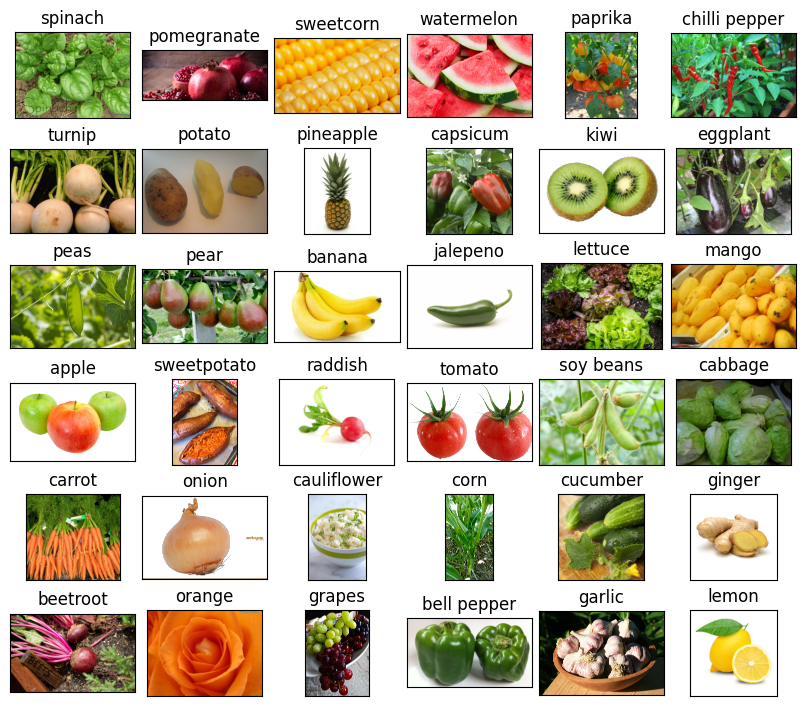

In [10]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()
#Visualizes one sample image for each class.

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
#Prepares images for training/testing by applying necessary transformations.

In [12]:
train_df['Filepath'] = train_df['Filepath'].astype(str)
import os
invalid_paths = train_df[~train_df['Filepath'].apply(os.path.exists)]
if not invalid_paths.empty:
    print("Invalid file paths detected:")
    print(invalid_paths)
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


Found 3115 validated image filenames belonging to 36 classes.


In [13]:
val_df['Filepath'] = val_df['Filepath'].astype(str)
import os
invalid_paths = val_df[~val_df['Filepath'].apply(os.path.exists)]
if not invalid_paths.empty:
    print("Invalid file paths detected:")
    print(invalid_paths)
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [14]:
test_df['Filepath'] = test_df['Filepath'].astype(str)
import os
invalid_paths = test_df[~test_df['Filepath'].apply(os.path.exists)]
if not invalid_paths.empty:
    print("Invalid file paths detected:")
    print(invalid_paths)
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 340 validated image filenames belonging to 36 classes.


In [15]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [16]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(36, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size=32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)
# Printing final accuracy
train_acc = history.history['accuracy'][-1]  #Last recorded train
val_acc = history.history['val_accuracy'][-1]  #Last recorded validation
print(f"Final Training Accuracy: {train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {val_acc * 100:.2f}%")


c:\Users\Vikaas\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10
98/98 [==============================] - 145s 1s/step - loss: 1.6306 - accuracy: 0.5653 - val_loss: 0.4419 - val_accuracy: 0.8618
Epoch 2/10
98/98 [==============================] - 97s 984ms/step - loss: 0.5421 - accuracy: 0.8247 - val_loss: 0.2353 - val_accuracy: 0.9265
Epoch 3/10
98/98 [==============================] - 107s 1s/step - loss: 0.3221 - accuracy: 0.8970 - val_loss: 0.2037 - val_accuracy: 0.9353
Epoch 4/10
98/98 [==============================] - 103s 1s/step - loss: 0.2093 - accuracy: 0.9329 - val_loss: 0.2671 - val_accuracy: 0.9294
Epoch 5/10
98/98 [==============================] - 99s 1s/step - loss: 0.1503 - accuracy: 0.9528 - val_loss: 0.1504 - val_accuracy: 0.9441
Epoch 6/10
98/98 [==============================] - 98s 994ms/step - loss: 0.1006 - accuracy: 0.9685 - val_loss: 0.2003 - val_accuracy: 0.9353
Epoch 7/10
98/98 [==============================] - 97s 990ms/step - loss: 0.0859 - accuracy: 0.9717 - val_loss: 0.1266 - val_accuracy: 0.9559
Epoch 8/

In [17]:
#predicting for test images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
#mapping
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 [==============================] - 17s 1s/step


['lemon',
 'paprika',
 'mango',
 'eggplant',
 'corn',
 'cabbage',
 'cauliflower',
 'bell pepper',
 'garlic',
 'mango',
 'sweetpotato',
 'paprika',
 'paprika',
 'pomegranate',
 'beetroot',
 'lettuce',
 'paprika',
 'eggplant',
 'sweetcorn',
 'potato',
 'watermelon',
 'pear',
 'apple',
 'beetroot',
 'watermelon',
 'mango',
 'eggplant',
 'eggplant',
 'capsicum',
 'potato',
 'tomato',
 'grapes',
 'onion',
 'soy beans',
 'grapes',
 'pear',
 'tomato',
 'lemon',
 'cucumber',
 'cabbage',
 'pineapple',
 'tomato',
 'lemon',
 'orange',
 'cucumber',
 'pomegranate',
 'chilli pepper',
 'sweetcorn',
 'cauliflower',
 'sweetcorn',
 'jalepeno',
 'cucumber',
 'pineapple',
 'turnip',
 'lettuce',
 'cauliflower',
 'tomato',
 'sweetpotato',
 'beetroot',
 'spinach',
 'corn',
 'corn',
 'peas',
 'sweetpotato',
 'raddish',
 'ginger',
 'turnip',
 'cabbage',
 'jalepeno',
 'corn',
 'tomato',
 'grapes',
 'beetroot',
 'mango',
 'sweetpotato',
 'apple',
 'turnip',
 'cabbage',
 'sweetcorn',
 'garlic',
 'pear',
 'lettuce

In [18]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [19]:
img = output('D:/suhas/suhas project/Fruit recgnition AIML/test/onion/Image_1.jpg')

1/1 [==============================] - 1s 1s/step


In [20]:
img

'onion'

In [21]:
model.save('FV.h5')

c:\Users\Vikaas\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


: 